In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/mens_summer_u20_ne_teams.csv')
teams_df

,Club ID,Club
0,175312,ALLIANCE UNITED U20 MEN
1,176211,THE BOROUGH FC U20 MEN
2,175390,MASTER'S FA U20 MEN
3,183432,PICKERING FC U20 MEN
4,175371,WOODBRIDGE STRIKERS U20 MEN EAST
5,175362,SIMCOE COUNTY ROVERS FC U20 MEN
6,183420,WHITBY FC U20 MEN
7,175412,UNIONVILLE MILLIKEN SC U20 MEN
8,175423,FC DURHAM U20 MEN
9,175418,AURORA FC U20 MEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-29_mens_summer_u20_ne_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262610521,3,1,175390,175362
1,262610522,5,2,175423,176211
2,262610523,3,2,175418,175412
3,262610524,1,3,183432,183420
4,262610525,3,2,175371,175312
5,262610526,3,2,176211,175418
6,262610527,4,3,175412,175371
7,262610528,4,0,175312,183420
8,262610529,4,0,183432,175390
9,262610530,4,3,175362,183420


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED U20 MEN  THE BOROUGH FC U20 MEN  MASTER'S FA U20 MEN  PICKERING FC U20 MEN  WOODBRIDGE STRIKERS U20 MEN EAST  SIMCOE COUNTY ROVERS FC U20 MEN  WHITBY FC U20 MEN  UNIONVILLE MILLIKEN SC U20 MEN  FC DURHAM U20 MEN  AURORA FC U20 MEN
262610521                        0                       0                    1                     0                                 0                               -1                  0                               0                  0                  0
262610522                        0                      -1                    0                     0                                 0                                0                  0                               0                  1                  0
262610523                        0                       0                    0                     0                                 0                                0                  0                              -1       

In [6]:
print(X_df.T.to_string())

                                  262610521  262610522  262610523  262610524  262610525  262610526  262610527  262610528  262610529  262610530  262610531  262610532  262610533  262610534  262610535  262610536  262610537  262610538  262610539  262610540  262610542  262610543  262610544  262610545  262610546  262610547  262610548  262610549  262610550  262610551  262610552  262610553  262610554  262610555  262610556  262610557  262610558  262610559  262610560  262610561  262610562  262610563  262610564  262610565  262610566  262610567  262610568  262610569  262610570  262610571
ALLIANCE UNITED U20 MEN                   0          0          0          0         -1          0          0          1          0          0          0          0         -1          0          0          0          0          0          0          1          0          0         -1          0          0          0          0         -1          0         -1          0          0          0          0          0

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                                  ALLIANCE UNITED U20 MEN  THE BOROUGH FC U20 MEN  MASTER'S FA U20 MEN  PICKERING FC U20 MEN  WOODBRIDGE STRIKERS U20 MEN EAST  SIMCOE COUNTY ROVERS FC U20 MEN  WHITBY FC U20 MEN  UNIONVILLE MILLIKEN SC U20 MEN  FC DURHAM U20 MEN  AURORA FC U20 MEN
ALLIANCE UNITED U20 MEN                                10                      -1                   -1                    -1                                -1                               -1                 -1                              -2                 -1                 -1
THE BOROUGH FC U20 MEN                                 -1                       9                   -1                    -1                                -2                               -1                  0                              -1                 -1                 -1
MASTER'S FA U20 MEN                                    -1                      -1                   10                    -1                                -

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                                  ALLIANCE UNITED U20 MEN  THE BOROUGH FC U20 MEN  MASTER'S FA U20 MEN  PICKERING FC U20 MEN  WOODBRIDGE STRIKERS U20 MEN EAST  SIMCOE COUNTY ROVERS FC U20 MEN  WHITBY FC U20 MEN  UNIONVILLE MILLIKEN SC U20 MEN  FC DURHAM U20 MEN  AURORA FC U20 MEN
ALLIANCE UNITED U20 MEN                                10                      -1                   -1                    -1                                -1                               -1                 -1                              -2                 -1                 -1
THE BOROUGH FC U20 MEN                                 -1                       9                   -1                    -1                                -2                               -1                  0                              -1                 -1                 -1
MASTER'S FA U20 MEN                                    -1                      -1                   10                    -1                                -

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                                  GD
ALLIANCE UNITED U20 MEN            0
THE BOROUGH FC U20 MEN             0
MASTER'S FA U20 MEN              -13
PICKERING FC U20 MEN              -3
WOODBRIDGE STRIKERS U20 MEN EAST  29
SIMCOE COUNTY ROVERS FC U20 MEN  -26
WHITBY FC U20 MEN                 -8
UNIONVILLE MILLIKEN SC U20 MEN     8
FC DURHAM U20 MEN                  2
AURORA FC U20 MEN                  0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                                  GD with limited blowouts
ALLIANCE UNITED U20 MEN                                 -3
THE BOROUGH FC U20 MEN                                  -2
MASTER'S FA U20 MEN                                    -12
PICKERING FC U20 MEN                                    -2
WOODBRIDGE STRIKERS U20 MEN EAST                        17
SIMCOE COUNTY ROVERS FC U20 MEN                        -16
WHITBY FC U20 MEN                                       -5
UNIONVILLE MILLIKEN SC U20 MEN                           8
FC DURHAM U20 MEN                                        5
AURORA FC U20 MEN                                        0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                                  massey_rating
WOODBRIDGE STRIKERS U20 MEN EAST       2.670429
AURORA FC U20 MEN                      0.800941
UNIONVILLE MILLIKEN SC U20 MEN         0.733333
THE BOROUGH FC U20 MEN                 0.374716
FC DURHAM U20 MEN                      0.158333
ALLIANCE UNITED U20 MEN                0.066667
PICKERING FC U20 MEN                  -0.258333
WHITBY FC U20 MEN                     -1.076734
MASTER'S FA U20 MEN                   -1.279703
SIMCOE COUNTY ROVERS FC U20 MEN       -2.189649


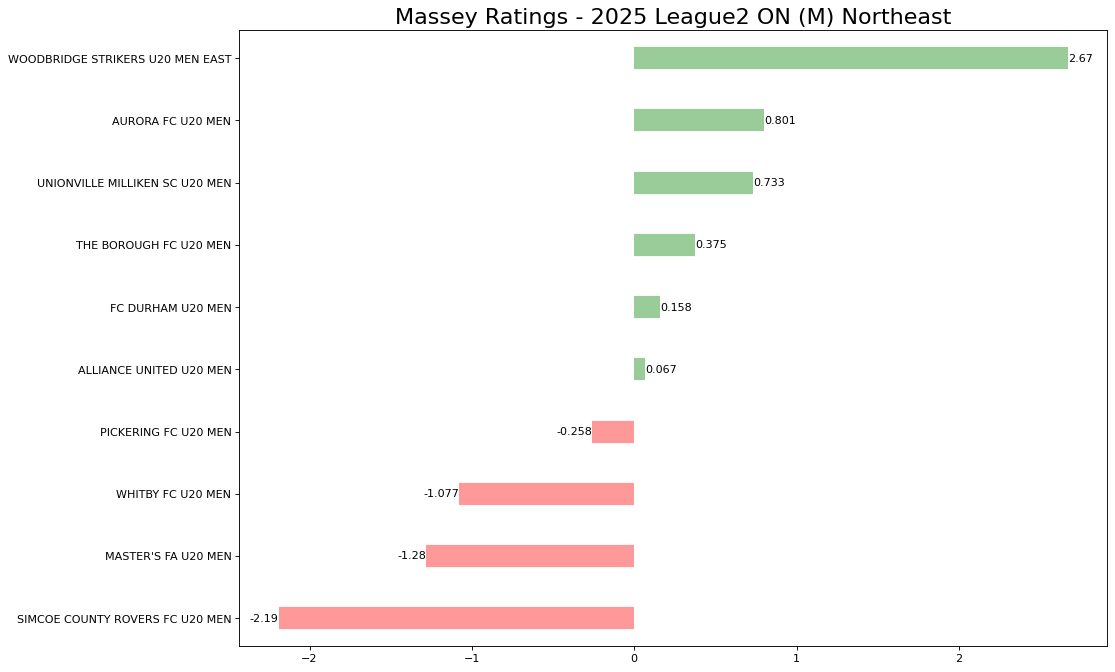

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                                  massey_rating
WOODBRIDGE STRIKERS U20 MEN EAST       1.547540
AURORA FC U20 MEN                      0.788688
UNIONVILLE MILLIKEN SC U20 MEN         0.708333
FC DURHAM U20 MEN                      0.441667
THE BOROUGH FC U20 MEN                 0.022938
PICKERING FC U20 MEN                  -0.141667
ALLIANCE UNITED U20 MEN               -0.208333
WHITBY FC U20 MEN                     -0.681842
MASTER'S FA U20 MEN                   -1.152895
SIMCOE COUNTY ROVERS FC U20 MEN       -1.324429


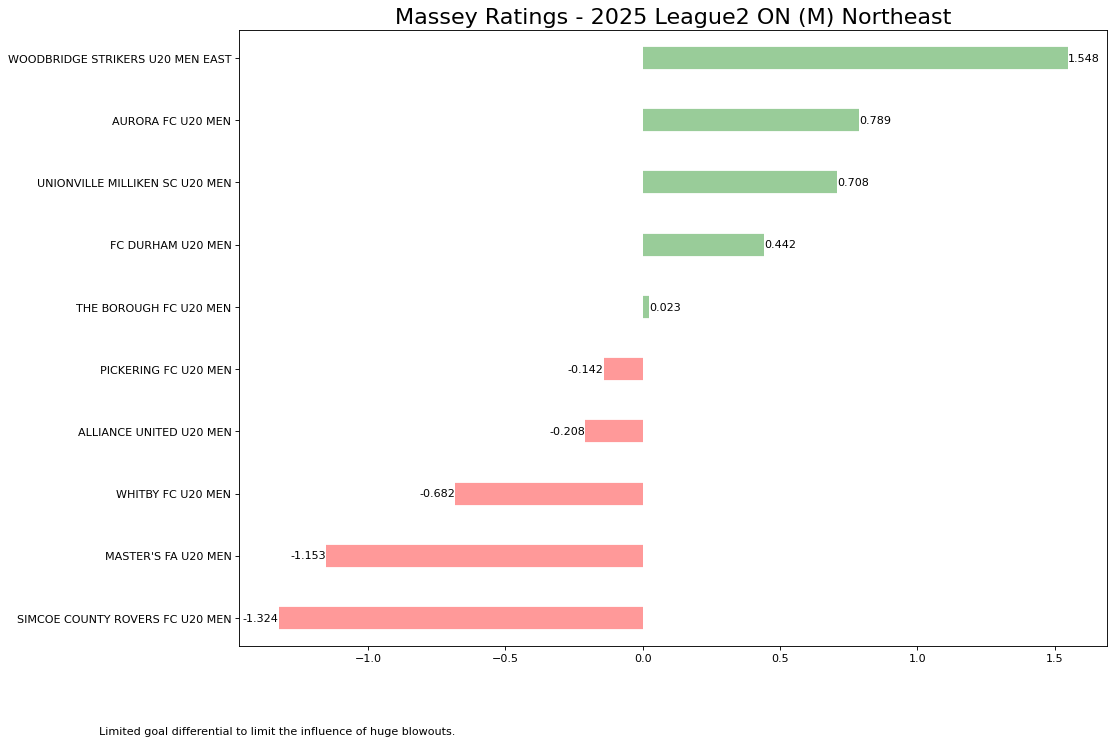

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()